<a href="https://colab.research.google.com/github/emiliomercuri/EnvHidrology2024/blob/main/aulas/2024_05_29-Aula17/Filtro_Digital_de_Eckhardt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtro Digital de Eckhardt

## Exemplo prático da aplicação do filtro

Estação Fluviométrica UVAIA (64444000), localizada na cabeceira do Rio Tibagi.

In [25]:
# importação das bibliotecas
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [26]:
# Baixando os dados da estação 64444000
!gdown 1Aj7Imy5btAd4n4IVgindT8yFlEXqx5zX

Downloading...
From: https://drive.google.com/uc?id=1Aj7Imy5btAd4n4IVgindT8yFlEXqx5zX
To: /content/64444000_vazao.csv
100% 248k/248k [00:00<00:00, 75.8MB/s]


In [27]:
# Importando os dados em um dataframe
vazao = pd.read_csv('64444000_vazao.csv', index_col= 0, sep =',')
vazao.index=pd.to_datetime(vazao.index)
vazao

,q(m3/s)
data,
1979-01-01,33.12
1979-01-02,32.92
1979-01-03,51.41
1979-01-04,75.46
1979-01-05,74.48
...,...
2017-06-26,134.10
2017-06-27,109.00
2017-06-28,82.04


<Axes: xlabel='data'>

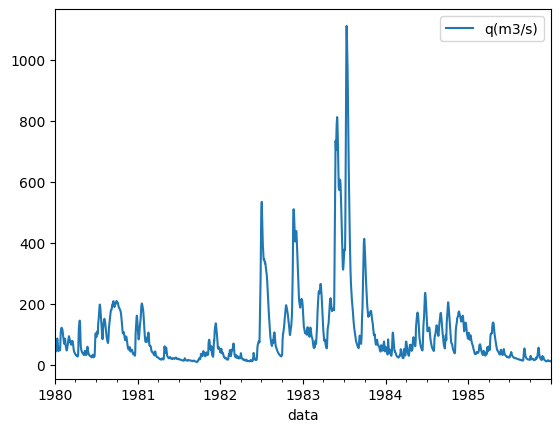

In [28]:
# seleção de um período menor (há algumas falhas nos períodos mais recentes)
vazao_sel = vazao['1980':'1985']
vazao_sel.plot()

A vazão total $y_i$ no passo de tempo $i$ é dividida em escoamento direto e fluxo de base:

$y_i = f_i + b_i$

* $f_i$: escoamento direto
* $b_i$: escoamento de base

A vazão de base $b_i$ (Eckhardt, 2005) é obtida por:

$\displaystyle b_i=\frac{\left(1-\mathrm{BFI}_{\max }\right) a b_{i-1}+(1-a) \mathrm{BFI}_{\max } y_i}{1-a \mathrm{BFI}_{\max }}$

sendo:

A constante da recessão $k$:

$\displaystyle k=\frac{-\Delta t}{\ln \left(\frac{Q_{(t+\Delta t)}}{Q_{(t)}}\right)}$

$\displaystyle a=e^{\displaystyle \frac{-\Delta t}{k}}$

$\displaystyle \mathrm{BFI}_{\max}=0.8344 \frac{Q_{90}}{Q_{50}}+0.2146$

# Estimativa de $Q_{90}$ e $Q_{50}$



In [29]:
# Vazão mínima, com 90% de permanência -> percentil 10%
Q90 = np.percentile(vazao_sel, 10)

# Vazão mediana -> percentil 50%
Q50 = np.percentile(vazao_sel, 50)

print(Q90, Q50)

17.88500000000001 60.78


### Estimando $BFI_{\max}$ por Collischonn e Fan (2012)

In [30]:
BFImax = 0.8344 * Q90/Q50 + 0.2146
print(BFImax)
# o resultado deve ser entre zero e um

0.4601288581770321


# Cálculo do coeficiente de recessão $k$

Vamos escolher um período de recessão, há um entre 1981 e 1982, veremos:

<Axes: xlabel='data'>

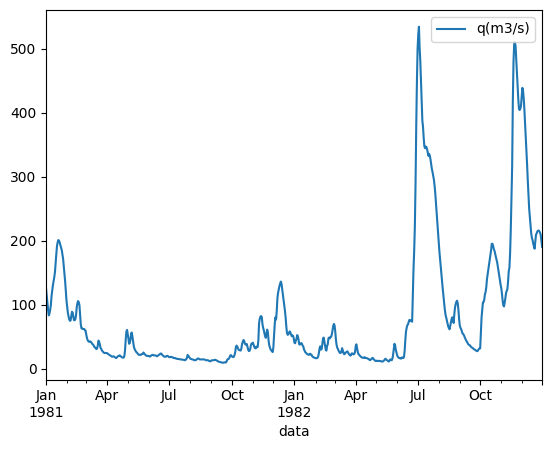

In [31]:
vazao['1981':'1982'].plot()

<Axes: xlabel='data'>

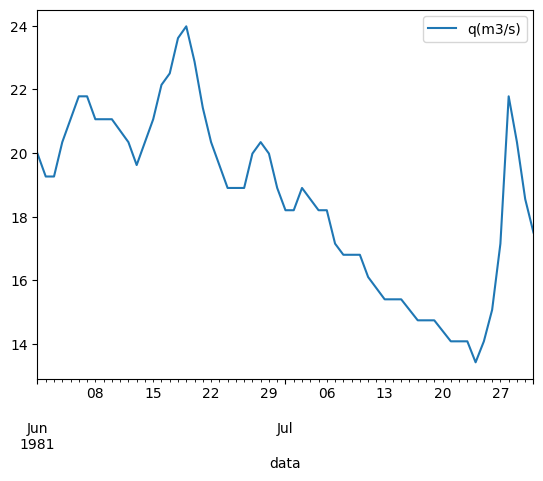

In [32]:
#selecionando recessão entre Junho e Julho de 1981
vazao['1981-06':'1981-07'].plot()

<Axes: xlabel='data'>

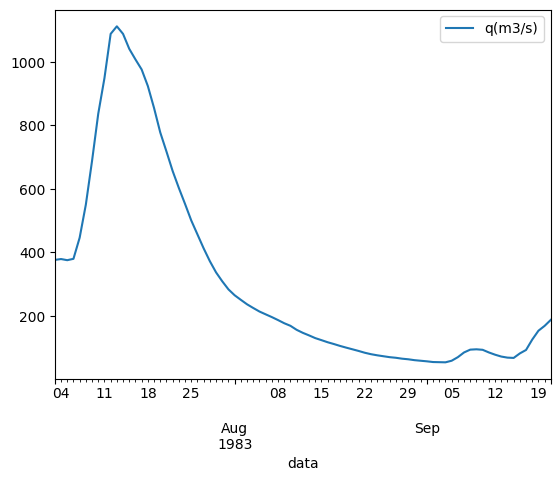

In [64]:
# Escolhendo outra curva de recessão
recessao = vazao['1983-07-03':'1983-09-21']
recessao.plot()

<Axes: xlabel='data'>

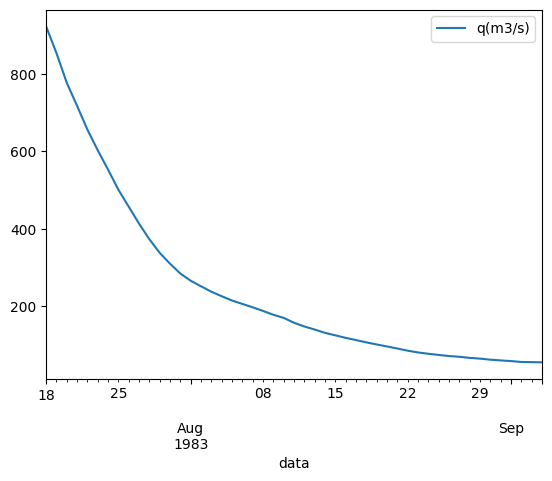

In [65]:
# refinando mais
recessao = vazao['1983-07-18':'1983-09-04']
recessao.plot()

In [66]:
recessao

,q(m3/s)
data,
1983-07-18,923.00
1983-07-19,854.00
1983-07-20,777.20
1983-07-21,717.40
1983-07-22,656.00
1983-07-23,602.70
1983-07-24,552.50
1983-07-25,500.70
1983-07-26,456.80


In [67]:
recessao['q(m3/s)(i+1)'] = recessao['q(m3/s)'].shift(-1)
recessao

<ipython-input-67-4427eeac0617>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recessao['q(m3/s)(i+1)'] = recessao['q(m3/s)'].shift(-1)


,q(m3/s),q(m3/s)(i+1)
data,,
1983-07-18,923.00,854.00
1983-07-19,854.00,777.20
1983-07-20,777.20,717.40
1983-07-21,717.40,656.00
1983-07-22,656.00,602.70
1983-07-23,602.70,552.50
1983-07-24,552.50,500.70
1983-07-25,500.70,456.80
1983-07-26,456.80,413.00


In [68]:
recessao = recessao[:-1]
recessao

,q(m3/s),q(m3/s)(i+1)
data,,
1983-07-18,923.00,854.00
1983-07-19,854.00,777.20
1983-07-20,777.20,717.40
1983-07-21,717.40,656.00
1983-07-22,656.00,602.70
1983-07-23,602.70,552.50
1983-07-24,552.50,500.70
1983-07-25,500.70,456.80
1983-07-26,456.80,413.00


# Cálculo do coeficiente de recessão $k$

$k=\frac{-\Delta t}{\ln \left(\frac{Q_{(t+\Delta t)}}{Q_{(t)}}\right)}$

O $\Delta t$ é 1 dia.

In [69]:
recessao['k'] = -1/np.log(recessao['q(m3/s)(i+1)']/recessao['q(m3/s)'])
recessao

<ipython-input-69-9132767ef6d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recessao['k'] = -1/np.log(recessao['q(m3/s)(i+1)']/recessao['q(m3/s)'])


,q(m3/s),q(m3/s)(i+1),k
data,,,
1983-07-18,923.00,854.00,12.870337
1983-07-19,854.00,777.20,10.611940
1983-07-20,777.20,717.40,12.489984
1983-07-21,717.40,656.00,11.176584
1983-07-22,656.00,602.70,11.800631
1983-07-23,602.70,552.50,11.498730
1983-07-24,552.50,500.70,10.157821
1983-07-25,500.70,456.80,10.897821
1983-07-26,456.80,413.00,9.920825


In [70]:
# Replace infinite updated data with nan
recessao.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
recessao.dropna(inplace=True)
recessao

<ipython-input-70-59d5e44edafb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recessao.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-70-59d5e44edafb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recessao.dropna(inplace=True)


,q(m3/s),q(m3/s)(i+1),k
data,,,
1983-07-18,923.00,854.00,12.870337
1983-07-19,854.00,777.20,10.611940
1983-07-20,777.20,717.40,12.489984
1983-07-21,717.40,656.00,11.176584
1983-07-22,656.00,602.70,11.800631
1983-07-23,602.70,552.50,11.498730
1983-07-24,552.50,500.70,10.157821
1983-07-25,500.70,456.80,10.897821
1983-07-26,456.80,413.00,9.920825


In [84]:
k = recessao['k'].mean()
print('A constante de recessão é:', k, 'dias')

A constante de recessão é: 22.913644370346407 dias


In [85]:
a = np.exp(-1/k)
print(a)

0.957296494165672


In [86]:
# O primeiro valor da vazão deve ser igual à vazão de base
vazao_sel['b(m3/s)'] = np.zeros(len(vazao_sel))
vazao_sel['b(m3/s)'][0] = vazao_sel['q(m3/s)'][0]
vazao_sel

<ipython-input-86-75a1d538763f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vazao_sel['b(m3/s)'] = np.zeros(len(vazao_sel))
<ipython-input-86-75a1d538763f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vazao_sel['b(m3/s)'][0] = vazao_sel['q(m3/s)'][0]


,q(m3/s),b(m3/s)
data,,
1980-01-01,56.25,56.25
1980-01-02,55.80,0.00
1980-01-03,54.02,0.00
1980-01-04,49.64,0.00
1980-01-05,46.20,0.00
...,...,...
1985-12-27,13.09,0.00
1985-12-28,12.76,0.00
1985-12-29,12.10,0.00


## Calculando a vazão de base

$$
b_i=\frac{\left(1-\mathrm{BFI}_{\max }\right) a b_{i-1}+(1-a) \mathrm{BFI}_{\max } y_i}{1-a \mathrm{BFI}_{\max }}
$$




In [87]:
B = np.zeros(len(vazao_sel))
B[0] = vazao_sel['b(m3/s)'][0]
B

array([56.25,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ])

In [88]:
for i in range(1,len(vazao_sel)):
  # vazão de base b(m3/s)
  B[i] = min(vazao_sel['q(m3/s)'][i],((1-BFImax)*a*vazao_sel['b(m3/s)'][i-1] + (1-a)*BFImax*vazao_sel['q(m3/s)'][i])/(1-a*BFImax))

vazao_sel['b(m3/s)'] = B

<ipython-input-88-37e4208d3db4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vazao_sel['b(m3/s)'] = B


In [89]:
vazao_sel

,q(m3/s),b(m3/s)
data,,
1980-01-01,56.25,56.250000
1980-01-02,55.80,53.857146
1980-01-03,54.02,0.255105
1980-01-04,49.64,0.234421
1980-01-05,46.20,0.218176
...,...,...
1985-12-27,13.09,0.061817
1985-12-28,12.76,0.060258
1985-12-29,12.10,0.057141


<Axes: xlabel='data'>

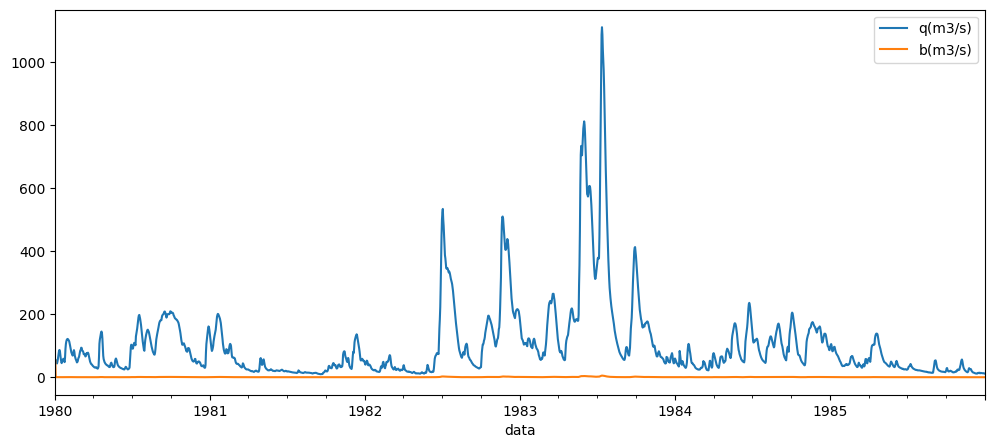

In [90]:
vazao_sel.plot(figsize=(12,5))

In [91]:
for i in range(1,len(vazao_sel)):
  # vazão de base b(m3/s)
  B[i] = min(vazao_sel['q(m3/s)'][i],((1-BFImax)*a*vazao_sel['b(m3/s)'][i-1] + (1-a)*BFImax*vazao_sel['q(m3/s)'][i])/(1-a*BFImax))

vazao_sel['b(m3/s)'] = B

<ipython-input-91-37e4208d3db4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vazao_sel['b(m3/s)'] = B


<Axes: xlabel='data'>

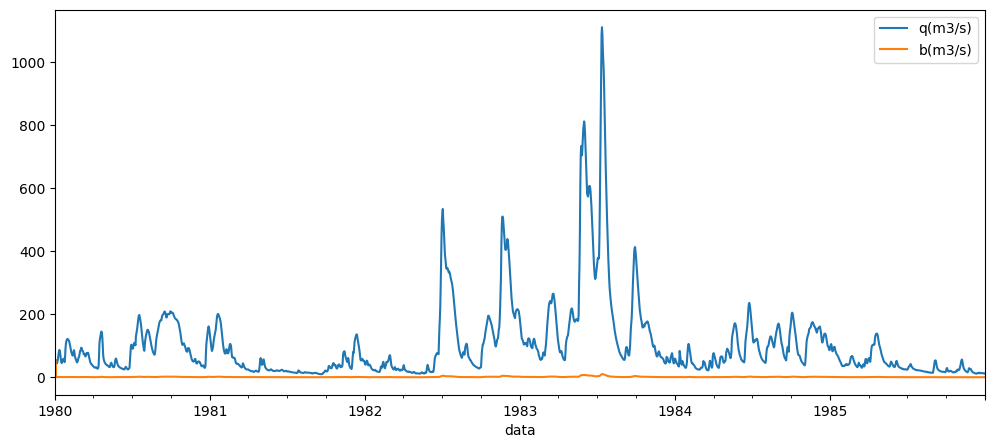

In [92]:
vazao_sel.plot(figsize=(12,5))

Se mudássemos os parâmetros

In [93]:
BFImax, k, a

(0.1, 22.913644370346407, 0.957296494165672)

<ipython-input-94-787d40d75111>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vazao_sel['b(m3/s)'] = B


<Axes: xlabel='data'>

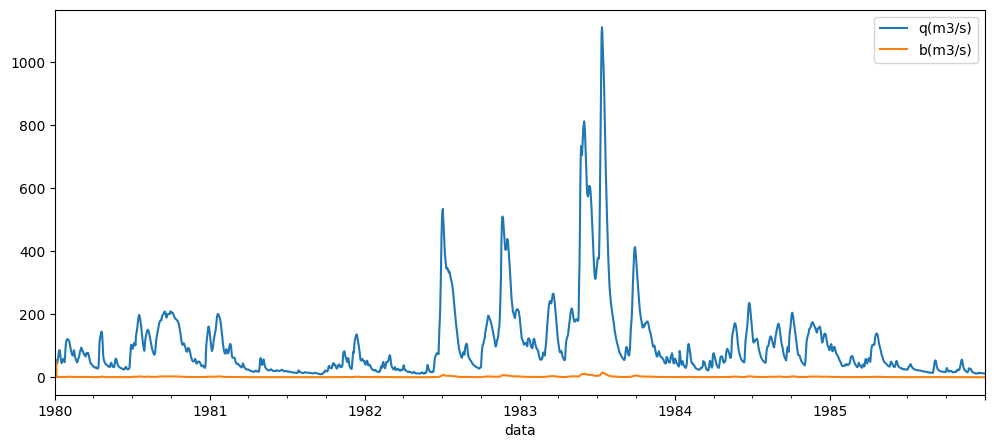

In [94]:
# Variando os valores para ver a influência no filtro
BFImax = 0.1

for i in range(1,len(vazao_sel)):
  # vazão de base b(m3/s)
  B[i] = min(vazao_sel['q(m3/s)'][i],((1-BFImax)*a*vazao_sel['b(m3/s)'][i-1] + (1-a)*BFImax*vazao_sel['q(m3/s)'][i])/(1-a*BFImax))

vazao_sel['b(m3/s)'] = B

vazao_sel.plot(figsize=(12,5))

<ipython-input-95-a4e9c66f44f1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vazao_sel['b(m3/s)'] = B


<Axes: xlabel='data'>

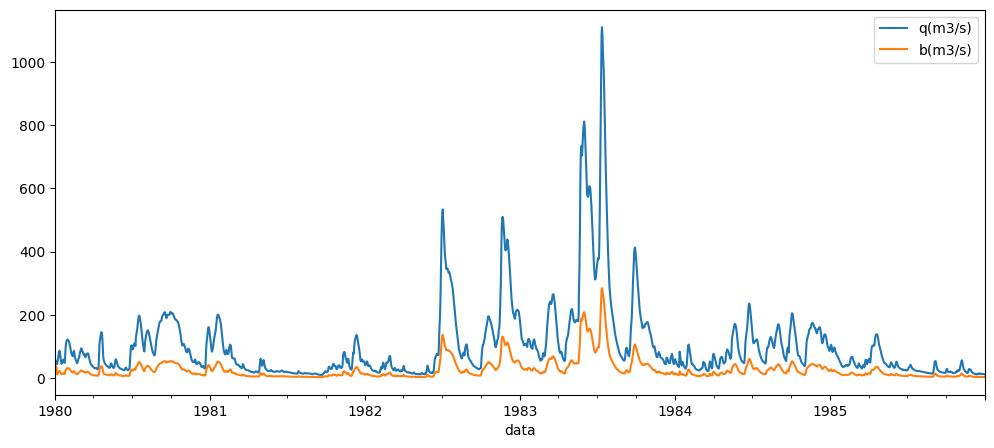

In [95]:
# Variando os valores para ver a influência no filtro
BFImax = 0.46
k = 2 # dias
a = np.exp(-1/k)

for i in range(1,len(vazao_sel)):
  # vazão de base b(m3/s)
  B[i] = min(vazao_sel['q(m3/s)'][i],((1-BFImax)*a*vazao_sel['b(m3/s)'][i-1] + (1-a)*BFImax*vazao_sel['q(m3/s)'][i])/(1-a*BFImax))

vazao_sel['b(m3/s)'] = B

vazao_sel.plot(figsize=(12,5))